# Logistic Regression - Multiclass Classification
Logistic regression assumes that the class attribute has only two values (e.g., good/bad, 1/0, 1/-1). When facing a problem with more class values, there are two options for applying a two value classifier. One can build one classifier for each class value and train it against all the other classes. Otherwise, one can minimize the loss using on the multinomial loss fit across the entire probability distribution.

In this example, we apply logistic regression using the <b>one versus the rest</b> evaluation using a well-known dataset called <a href="https://en.wikipedia.org/wiki/Iris_flower_data_set">Iris</a>

First we load all the needed libraries.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model, datasets
from sklearn import model_selection
%matplotlib inline

Let's define the colormaps that we will use for plotting

In [2]:
from matplotlib.colors import ListedColormap
background_cmap = ListedColormap(['#68abf0','#b2d0b7','#f65d79'])
background_cmap = ListedColormap(['#a6cdf6','#b2d0b7','#f98ea1'])
dots_cmap = ListedColormap(['#1b80e8','#599062','#e20c32'])
# plt.register_cmap(cmap=background_cmap)
plt.register_cmap(cmap=dots_cmap)
colors = ['#1b80e8','#599062','#e20c32']

Next, we load the dataset that is included in the Scikit-Learn dataset module.

In [3]:
# import some data to play with
iris = datasets.load_iris()
target = np.array(iris.target)

print("Number of examples: ", iris.data.shape[0])
print("Number of variables:", iris.data.shape[0])
print("Variable names:     ", iris.feature_names)
print("Target values:      ", iris.target_names)
print("Class Distribution  ", [(x,sum(target==x)) for x in np.unique(target)])

Number of examples:  150
Number of variables: 150
Variable names:      ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target values:       ['setosa' 'versicolor' 'virginica']
Class Distribution   [(0, 50), (1, 50), (2, 50)]


We will use only the first two variables (sepal length and sepal width)

In [4]:
X = iris.data[:, :2]
y = iris.target

And build a logistic regression model without regularization (thus, $\alpha=0$ which means that C must be very large) and using <b>one versus rest</b> for multiclass classification (this is the default option so <b>multi_class='ovr'</b> can be avoided.

In [5]:
logistic = linear_model.LogisticRegression(C=10e10, multi_class='ovr',random_state=1234)
logistic.fit(X,y)
xval = model_selection.cross_val_score(logistic, X, y)

print ("Average accuracy = %3.2f +/- %3.2f" %(np.average(xval),np.std(xval)))

Average accuracy = 0.81 +/- 0.04


Let's plot the decision boundaries. First we compute the boundaries for the two input variables (x0_min & x0_max; x1_min & x1_max). Next we build a grid and compute the classification for each position so as to paint the regions according to an assigned class.

In [6]:
x0_min, x0_max = X[:, 0].min() - .5, X[:, 0].max() + .5
x1_min, x1_max = X[:, 1].min() - .5, X[:, 1].max() + .5

h = .01
xx0, xx1 = np.meshgrid(np.arange(x0_min, x0_max, h), np.arange(x1_min, x1_max, h))

z = logistic.predict(np.c_[xx0.ravel(), xx1.ravel()])

Now let's plot the points and the boundaries.

/var/folders/px/lf3cg8fd5b5d9mb_fwy3r62h0000gn/T/ipykernel_67585/2571529588.py:3: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx0, xx1, z, cmap=background_cmap)


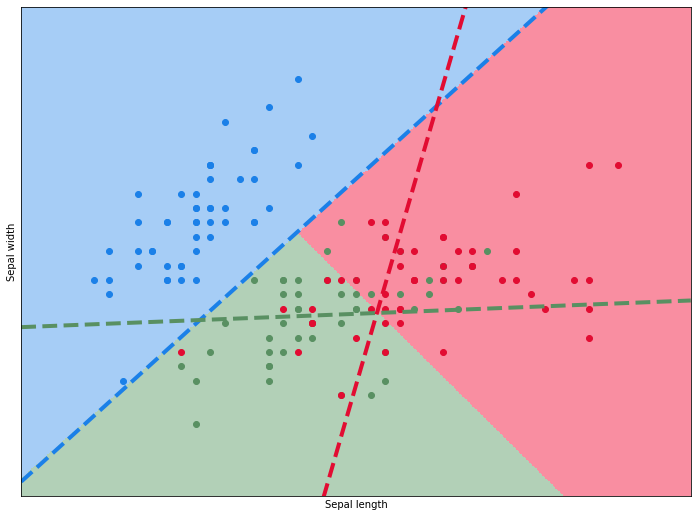

In [7]:
z = z.reshape(xx0.shape)
plt.figure(1, figsize=(12, 9))
plt.pcolormesh(xx0, xx1, z, cmap=background_cmap)

font = {'family' : 'sans', 'size'   : 32}
plt.rc('font', **font)

for i, color in zip(logistic.classes_, colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color) #, cmap=plt.cm.Pastel2)

plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx0.min(), xx0.max())
plt.ylim(xx1.min(), xx1.max())
plt.xticks(())
plt.yticks(())


### plot also the planes
coef = logistic.coef_
intercept = logistic.intercept_

def plot_hyperplane(c, color):
    def line(x0):
        return (-(x0 * coef[c, 0]) - intercept[c]) / coef[c, 1]
    plt.plot([x0_min, x0_max], [line(x0_min), line(x0_max)],
             ls="--", lw=4, color=color)

# colors = "rgb"
for i, color in zip(logistic.classes_, colors):
    plot_hyperplane(i, color)
plt.savefig("fig_iris_ovr.png");
plt.show()


We now repeat the same procedure using the multinomial approach.

In [8]:
logistic_mn = linear_model.LogisticRegression(C=10e10, solver='sag', multi_class='multinomial', random_state=1234, max_iter=10000)
logistic_mn.fit(X,y)
xval = model_selection.cross_val_score(logistic_mn, X, y)

print ("Average accuracy = %3.2f +/- %3.2f" %(np.average(xval),np.std(xval)))

Average accuracy = 0.82 +/- 0.06


/var/folders/px/lf3cg8fd5b5d9mb_fwy3r62h0000gn/T/ipykernel_67585/915825988.py:11: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx0, xx1, z, cmap=background_cmap)


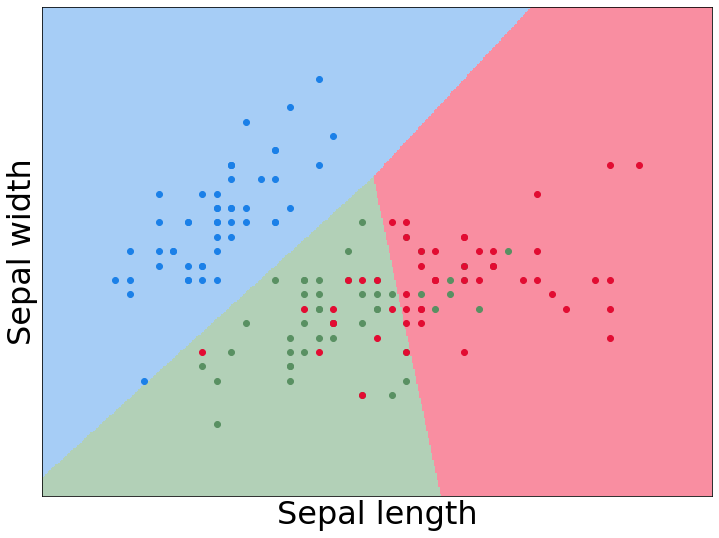

In [9]:
x0_min, x0_max = X[:, 0].min() - .5, X[:, 0].max() + .5
x1_min, x1_max = X[:, 1].min() - .5, X[:, 1].max() + .5

h = .01
xx0, xx1 = np.meshgrid(np.arange(x0_min, x0_max, h), np.arange(x1_min, x1_max, h))

z = logistic_mn.predict(np.c_[xx0.ravel(), xx1.ravel()])

z = z.reshape(xx0.shape)
plt.figure(1, figsize=(12, 9))
plt.pcolormesh(xx0, xx1, z, cmap=background_cmap)

font = {'family' : 'sans', 'size'   : 32}
plt.rc('font', **font)

for i, color in zip(logistic_mn.classes_, colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color) #, cmap=plt.cm.Pastel2)

plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx0.min(), xx0.max())
plt.ylim(xx1.min(), xx1.max())
plt.xticks(())
plt.yticks(())
plt.savefig("fig_iris_multinomial.png");
plt.show()


## Questions
- Why are we using the random start?
- What happens if we modify the value of C and decrease it significantly?
- We applied 10-fold crossvalidation to evaluate each algorithm. But 10-fold crossvalidation generates ten models with different performances, which one should we deploy at the end?